In [1]:
from util import agg_jsonls
from pprint import pprint
import seaborn as sns
import matplotlib.pyplot  as plt
import pandas as pd
import numpy as np
from datetime import datetime, timedelta

%matplotlib inline

In [2]:
from src.maps import tag_map, relative_date
from src.cleaning import build_df_from_RA, format_GB_to_df
from src.loading import load_dataset

reviewsRA = load_dataset("final_dataset_RA")
df_RA = build_df_from_RA(reviewsRA)
print(f"We have a total of {len(reviewsRA)} reviews!")

We have a total of 51655 reviews!


In [3]:
df_RA['datetime'] = pd.to_datetime(df_RA.datetime)
df_RA['month'] = df_RA['datetime'].dt.strftime('%m/%Y')
df_RA.head()

,business_issues,business_issues_Customer Services,business_issues_Delivery,business_issues_Maintenance,business_issues_Online Services,business_issues_Payment,business_name,city,datetime,days_to_first_contact,...,products_Home Appliances,products_Others,resolution_outcome,review_ID,service_grade,timeCaptured,title,uf,would_buy_again,month
0,NaN,NaN,NaN,NaN,NaN,NaN,Tok&Stok - Loja Online,Embu das Artes,2020-03-26 12:48:00+00:00,NaN,...,NaN,NaN,NaN,102002173,NaN,2020-03-27T12:08:11Z,Paguei e nao recebi,SP,NaN,03/2020
1,1.0,NaN,1.0,NaN,NaN,NaN,Tok&Stok - Loja Online,Cuiabá,2020-03-26 22:09:00+00:00,NaN,...,NaN,NaN,NaN,102028063,NaN,2020-03-27T12:08:11Z,Não entregaram o móvel,MT,NaN,03/2020
2,1.0,NaN,NaN,NaN,NaN,1.0,Tok&Stok - Loja Online,Rio de Janeiro,2020-03-25 16:50:00+00:00,NaN,...,NaN,NaN,NaN,101970443,NaN,2020-03-27T12:08:14Z,Não recebi um dos itens do meu pedido e fui co...,RJ,NaN,03/2020
3,NaN,NaN,NaN,NaN,NaN,NaN,Tok&Stok - Loja Online,Acopiara,2020-03-25 16:52:00+00:00,NaN,...,NaN,NaN,NaN,101970555,NaN,2020-03-27T12:08:14Z,Produto não foi entregue e não resolvem,CE,NaN,03/2020
4,3.0,2.0,NaN,NaN,NaN,1.0,Tok&Stok - Loja Online,Vila Velha,2020-03-25 20:20:00+00:00,NaN,...,NaN,NaN,NaN,101979855,NaN,2020-03-27T12:08:14Z,Não entregaram e produto e não devolvem o valo...,ES,NaN,03/2020


In [31]:
unique_ids = set()
reviewsGB = []
for complaint in agg_jsonls("final_dataset_GB_1704"):
    if "id_review" in complaint and complaint["id_review"] not in unique_ids:
        unique_ids.add(complaint["id_review"])
        reviewsGB.append(complaint)

print(f"We have a total of {len(reviewsGB)} reviews!")

We have a total of 140416 reviews!


In [32]:
df_GB = pd.DataFrame([format_GB_to_df(row) for row in reviewsGB])
df_GB['year'] = df_GB['date_comment'].dt.year
df_GB['month'] = df_GB['date_comment'].dt.strftime('%m/%Y')
df_GB['week'] = df_GB['date_comment'].dt.week
df_GB.head()

,business_issues,business_issues_Customer Services,business_issues_Delivery,business_issues_Maintenance,business_issues_Online Services,business_issues_Payment,caption,date_comment,id_review,latitude,...,rating,relative,relative_date,retrieval_date,store,url_user,username,year,month,week
0,NaN,NaN,NaN,NaN,NaN,NaN,Muito boa! O Cleversom nos atendeu com muita ...,2020-03-23 17:25:36,ChdDSUhNMG9nS0VJQ0FnSUNjdGN1SHJnRRABGhY3RXo1WS...,-23.5448085,...,4.0,21,3 semanas atrás,2020-04-13T17:25:36Z,casas-bahia,https://www.google.com/maps/contrib/1097179363...,Veranilce Carelli,2020,03/2020,13
1,NaN,NaN,NaN,NaN,NaN,NaN,Atendimento muito bom.!,2020-03-23 17:25:36,ChdDSUhNMG9nS0VJQ0FnSUNjNWNHYXRBRRABGhZ2Z1lLMj...,-23.5448085,...,5.0,21,3 semanas atrás,2020-04-13T17:25:36Z,casas-bahia,https://www.google.com/maps/contrib/1155639396...,Mathias Villan,2020,03/2020,13
2,NaN,NaN,NaN,NaN,NaN,NaN,,2020-03-23 17:25:36,ChZDSUhNMG9nS0VJQ0FnSUNjaFphblhBEAEaFmM0cTBhaV...,-23.5448085,...,5.0,21,3 semanas atrás,2020-04-13T17:25:36Z,casas-bahia,https://www.google.com/maps/contrib/1147321611...,Maristela Boguta,2020,03/2020,13
3,NaN,NaN,NaN,NaN,NaN,NaN,,2020-03-23 17:25:36,ChdDSUhNMG9nS0VJQ0FnSUNjaGNidzNBRRABGhZ4Z3Z6bG...,-23.5448085,...,5.0,21,3 semanas atrás,2020-04-13T17:25:36Z,casas-bahia,https://www.google.com/maps/contrib/1067857579...,Daniele Andrade,2020,03/2020,13
4,NaN,NaN,NaN,NaN,NaN,NaN,👍🏼,2020-03-16 17:25:36,ChdDSUhNMG9nS0VJQ0FnSUNjLWFHYjF3RRABGhZROFBDNF...,-23.5448085,...,5.0,28,4 semanas atrás,2020-04-13T17:25:36Z,casas-bahia,https://www.google.com/maps/contrib/1042944931...,Pastor L L j,2020,03/2020,12


In [4]:
online_st = ['Tok&Stok - Loja Online ','Etna Home Store - Loja Online','Marabraz - Loja Online',
             'MadeiraMadeira','Casas Bahia - Marketplace', 'Casas Bahia - Loja Online','Ponto Frio - Loja Online']
df_RA.loc[df_RA['business_name'].isin(online_st),'online'] = 1
df_RA.loc[~df_RA['business_name'].isin(online_st),'online'] = 0

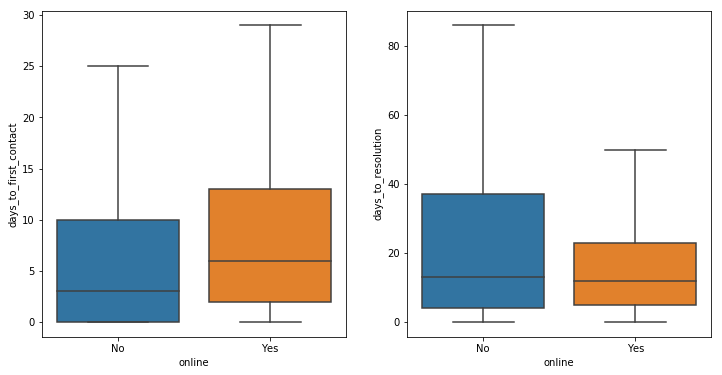

In [5]:
fig = plt.figure(figsize=(12,6))
ax1 = plt.subplot(1,2,1)
sns.boxplot(x=df_RA['online'],y=df_RA['days_to_first_contact'],showfliers=False)
ax1.set_xticklabels(['No', 'Yes'])

ax2 = plt.subplot(1,2,2)
sns.boxplot(x=df_RA['online'],y=df_RA['days_to_resolution'],showfliers=False)
ax2.set_xticklabels(['No', 'Yes']);

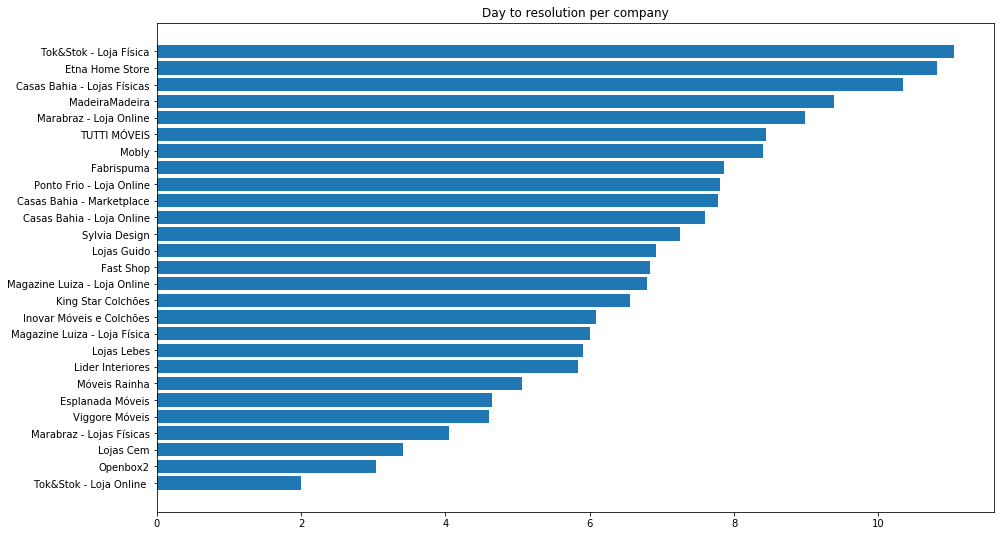

In [26]:
view = df_RA.loc[df_RA.days_to_resolution <= 20].groupby('business_name').agg({'days_to_resolution': 'mean'}).reset_index().dropna().sort_values(by="days_to_resolution")

height = view[view.business_name!='']["days_to_resolution"]
bars = view[view.business_name!='']["business_name"]
y_pos = np.arange(len(bars))

fig, ax = plt.subplots(figsize=(15,9))
plt.barh(y_pos, height)
plt.yticks(y_pos, bars)
plt.title('Day to resolution per company')
plt.show()

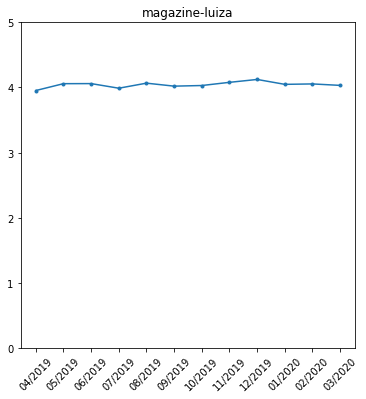

In [37]:
var_month = ['um ano atrás', '11 meses atrás', '10 meses atrás', '9 meses atrás', '8 meses atrás', 
             '7 meses atrás', '6 meses atrás', '5 meses atrás', '4 meses atrás', '3 meses atrás', 
             '2 meses atrás', 'um mês atrás', '4 semanas atrás', '3 semanas atrás','uma semana atrás','2 semanas atrás']

i = 'magazine-luiza'
fig, ax = plt.subplots(figsize=(6,6))
graph = df_GB[df_GB['store']==i].copy()
graph = graph[graph['relative_date'].isin(var_month)].groupby(['month']).agg({'rating':'mean',
                                                                                 'date_comment':'max'}).reset_index()
plt.plot(graph['date_comment'].sort_values().dt.strftime('%m/%Y'), graph['rating'],marker='.')
plt.title(i)
ax.set_yticks([0.0,1.0,2.0,3.0,4.0,5.0])
plt.xticks(rotation=45);


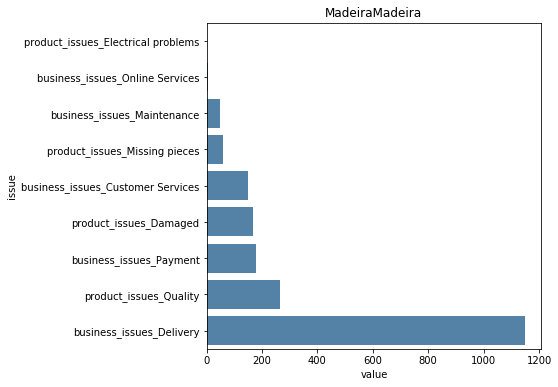

In [43]:
i = 'MadeiraMadeira'
company_issues = df_RA.groupby("business_name").count()[[col for col in df_RA.columns if "issue" in col]].reset_index()
company_issues = pd.melt(company_issues,id_vars=["business_name"], value_vars=[col for col in company_issues.columns if "issue" in col], var_name="issue").sort_values(by="value")
company_issues = company_issues[~company_issues['issue'].isin(['business_issues','product_issues'])]

fig, ax = plt.subplots(figsize=(6,6))
sns.barplot(x="value",y="issue", data=company_issues.loc[company_issues.business_name == i],color="steelblue")
plt.title(i);

In [45]:
import pickle

In [54]:
pickle_out1 = open("RA.pickle","wb")
pickle.dump(df_RA, pickle_out1)
pickle_out1.close()

In [55]:
pickle_out2 = open("GB.pickle","wb")
pickle.dump(df_GB, pickle_out2)
pickle_out2.close()

In [56]:
pickle_out3 = open("Company Issues.pickle","wb")
pickle.dump(company_issues, pickle_out3)
pickle_out3.close()